In [212]:
# Import libraries 
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype 
from sklearn import model_selection, metrics

In [213]:
df = pd.read_csv("./Output/Combined_dataset.csv")
df = df.drop('Unnamed: 0', axis=1)
print(df.shape)

(1000, 32)


In [214]:
#Get name of cols
for i in range(0,32):
    print(df.columns[i])

backers_count
blurb
category
converted_pledged_amount
country
created_at
current_currency
deadline
fx_rate
goal
id
launched_at
location
name
pledged
profile
slug
source_url
spotlight
staff_pick
state
state_changed_at
static_usd_rate
urls
usd_pledged
usd_type
story
faq
num_faq
comments
n_comments
duration


In [215]:
#View df sample
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,...,static_usd_rate,urls,usd_pledged,usd_type,story,faq,num_faq,comments,n_comments,duration
0,1,With your help we will create this device that...,"{""id"":331,""name"":""3D Printing"",""slug"":""technol...",1,ES,2015-08-18 21:01,USD,2016-07-09 20:11,1.212886,15000,...,1.136930,"{""web"":{""project"":""https://www.kickstarter.com...",1.136930,domestic,Producto Final\nHi! The funds we will used to ...,[' '],0,Only backers can post comments. Log in\nNo com...,0,30 days 00:00:00.000000000
1,2,We at Ormiston Primary are looking at starting...,"{""id"":309,""name"":""Farms"",""slug"":""food/farms"",""...",9,NZ,2015-08-11 18:04,USD,2015-09-11 15:55,0.723585,5000,...,0.655304,"{""web"":{""project"":""https://www.kickstarter.com...",9.829555,domestic,At Ormiston Primary School we are looking at c...,[' '],0,Only backers can post comments. Log in\nNo com...,0,30 days 00:00:00.000000000
2,0,Self-taught aspiring metalsmith Looking for he...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",0,US,2015-04-28 21:14,USD,2015-05-28 21:14,1.000000,10000,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,Hello world :-] My name is Bryan. I have been ...,[' '],0,Only backers can post comments. Log in\nNo com...,0,29 days 00:16:51.000000000
3,0,So many women believe they are past their prim...,"{""id"":278,""name"":""People"",""slug"":""photography/...",0,US,2014-07-07 1:30,USD,2014-10-26 0:00,1.000000,2000,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,I'm tired of woman being overlooked and consid...,[' '],0,Only backers can post comments. Log in\nNo com...,0,30 days 00:00:00.000000000
4,10,The Horror Zine's Jeani Rector brings us anoth...,"{""id"":324,""name"":""Anthologies"",""slug"":""publish...",340,US,2014-11-04 16:30,USD,2014-12-09 9:20,1.000000,2500,...,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",340.000000,international,Table of Contents\n• TAPEWORM by Martin Rose\n...,[' '],0,Only backers can post comments. Log in\nPaula ...,1,30 days 00:00:00.000000000


In [216]:
# Drop Duplicates
df = df.drop_duplicates('id', keep ='first')

In [217]:
#Check for NA
df.isna().sum()

backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
current_currency            0
deadline                    0
fx_rate                     0
goal                        0
id                          0
launched_at                 0
location                    1
name                        0
pledged                     0
profile                     0
slug                        0
source_url                  0
spotlight                   0
staff_pick                  0
state                       0
state_changed_at            0
static_usd_rate             0
urls                        0
usd_pledged                 0
usd_type                    0
story                       5
faq                         0
num_faq                     0
comments                    0
n_comments                  0
duration                    0
dtype: int64

In [218]:
#Replace NA for story and location

# Fill na for text cols
df["story"].fillna(" ", inplace = True)

# Fill na for location cols
df["story"].fillna(" ", inplace = True)

In [219]:
# Convert numerical cols type to int/float
df['duration'] = pd.to_numeric(pd.to_timedelta(df['duration']).dt.days, downcast='integer')
df['num_faq'] = df['num_faq'].astype(int)
df['n_comments'] = df['n_comments'].str.replace(',', '').astype(float)

In [220]:
df[['duration','num_faq','n_comments']]

,duration,num_faq,n_comments
0,30,0,0.0
1,30,0,0.0
2,29,0,0.0
3,30,0,0.0
4,30,0,1.0
...,...,...,...
995,12,0,0.0
996,30,0,0.0
997,22,0,0.0
998,25,0,2.0


In [221]:
# Convert rows from str to dict
def string_to_dict(dict_string):
    # Convert to proper json format
    dict_string = dict_string.replace("'", "'").replace('u"', '"')
    return json.loads(dict_string)

df.category = df.category.apply(string_to_dict)

In [222]:
# Get category values from dictionary
df['parent_category'] = [d.get('parent_name') for d in df.category]
df["parent_category"].fillna("No Parent Category", inplace = True)

df['category_name'] = [d.get('name') for d in df.category]

In [223]:
df[['category_name','parent_category']]

,category_name,parent_category
0,3D Printing,Technology
1,Farms,Food
2,Mixed Media,Art
3,People,Photography
4,Anthologies,Publishing
...,...,...
995,Apparel,Fashion
996,Painting,Art
997,Performances,Dance
998,Apparel,Fashion


In [224]:
df[['category_name','parent_category']]

,category_name,parent_category
0,3D Printing,Technology
1,Farms,Food
2,Mixed Media,Art
3,People,Photography
4,Anthologies,Publishing
...,...,...
995,Apparel,Fashion
996,Painting,Art
997,Performances,Dance
998,Apparel,Fashion


In [225]:
#Change state to binary (1 = success project, 0 = failed project)
df.state = df.state.astype('category').cat.codes

In [226]:
# Clean up comments 
df['comments'] = df['comments'].apply(lambda x: x.replace('Only backers can post comments. Log in\n',""))

In [227]:
df.sample(5)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,goal,...,usd_pledged,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name
721,24,A ten minute short relationship drama in black...,"{'id': 293, 'name': 'Drama', 'slug': 'film & v...",714,GB,2018-06-12 4:27,USD,2018-07-18 8:30,1.382164,400,...,723.885977,domestic,"O is a short film written, directed and edited...",[' '],0,No comments yet.,0.0,21,Film & Video,Drama
916,9,A photographic novella telling the story of a ...,"{'id': 276, 'name': 'Fine Art', 'slug': 'photo...",1003,US,2016-02-29 14:59,USD,2016-07-27 13:21,1.000000,5500,...,1003.000000,domestic,"Overview\nMy name is Angie Rucker, and I want ...",[' '],0,No comments yet.,0.0,30,Photography,Fine Art
382,18,Based upon the 1959 Italian/French classic blo...,"{'id': 252, 'name': 'Graphic Novels', 'slug': ...",694,US,2016-06-03 20:07,USD,2016-06-27 22:09,1.000000,99,...,694.000000,domestic,Hercules Unchained is one of my favorite sword...,[' '],0,"KunalSuperbacker\nover 4 years ago\nHi team,\n...",1.0,15,Comics,Graphic Novels
218,32,The Quad Traverse will be a documentary film t...,"{'id': 30, 'name': 'Documentary', 'slug': 'fil...",1660,US,2017-08-05 16:30,USD,2017-08-23 11:59,1.000000,1500,...,1660.000000,domestic,"The Quad Traverse (that's a working title, by ...",[' '],0,This person has canceled their pledge. Show th...,1.0,14,Film & Video,Documentary
691,23,An interactive children's picture book complet...,"{'id': 46, 'name': 'Children's Books', 'slug':...",5014,US,2020-10-04 18:15,USD,2020-12-01 11:09,1.000000,4531,...,5014.000000,domestic,"Hello! We are Victoria and Stephanie, writer a...",[' '],0,No comments yet.,0.0,36,Publishing,Children's Books


In [228]:
#Get name of cols (after clean)
for i in range(0,34):
    print(df.columns[i])

backers_count
blurb
category
converted_pledged_amount
country
created_at
current_currency
deadline
fx_rate
goal
id
launched_at
location
name
pledged
profile
slug
source_url
spotlight
staff_pick
state
state_changed_at
static_usd_rate
urls
usd_pledged
usd_type
story
faq
num_faq
comments
n_comments
duration
parent_category
category_name


### Feature engineer 1: Get month and year of launch

In [229]:
# Get month/year of launch/deadline
df['month_launched'] = pd.DatetimeIndex(df['launched_at']).month.astype(int)
df['year_launched'] = pd.DatetimeIndex(df['launched_at']).year.astype(int)

### Keep only useful cols for modelling based on our objective

In [230]:
#pledge, usd_pledge and converted_pledged_amt basically is the same thing, keep pledge col only
#Country and location basically the same, keep country
#Not meaningful cols: profile, created at, deadline, id, launched_at, source url, state chnaged at, urls, static usd rate
#drop category (extracted parent cat and cat name)
#name and slug basicially the same (drop slug)

cols_to_drop = ['profile', 'category', 'created_at', 'location', 'current_currency', 'deadline', 'id', 
                'launched_at', 'slug', 'source_url', 'state_changed_at', 'urls', 'static_usd_rate', 
                'usd_pledged', 'converted_pledged_amount']

df = df.drop(cols_to_drop, axis=1)

### EDA

In [231]:
# Separate cols by type
categorical_cols = ['country', 'staff_pick', 'usd_type', 'parent_category', 'category_name','spotlight']
num_cols = ['backers_count', 'fx_rate', 'goal', 'pledged', 'num_faq', 'n_comments', 'duration', 'month_launched', 'year_launched']
text_cols = ['blurb', 'name', 'story', 'faq', 'comments']

cat_df = df[categorical_cols]
num_df = df[num_cols]
text_df = df[text_cols]

### Exploring Categorical DF 

In [232]:
for i in cat_df.columns:
    print(cat_df[i].value_counts())
    print(" ")

US    645
GB    117
CA     43
AU     29
DE     22
MX     20
FR     19
ES     18
NL     11
IT     10
SE      9
SG      8
HK      6
NZ      5
DK      5
JP      4
CH      4
AT      3
BE      2
NO      2
IE      2
LU      1
Name: country, dtype: int64
 
False    849
True     136
Name: staff_pick, dtype: int64
 
domestic         735
international    250
Name: usd_type, dtype: int64
 
Art                   192
Film & Video          144
Technology             83
Music                  83
Photography            71
Games                  66
Publishing             63
Fashion                60
No Parent Category     58
Journalism             44
Comics                 37
Food                   33
Theater                30
Dance                  18
Crafts                  3
Name: parent_category, dtype: int64
 
Painting          56
Illustration      56
World Music       53
Web               50
Apparel           48
                  ..
Periodicals        1
Embroidery         1
Small Batch        1
M

In [233]:
#US and GB has the most number of project
#Top 5 most popular cat: Art, Film & video, Tech, music, photography
#Top 5 most popular sub-cat: painting, illustration, world music, web and apparel

### Exploring Numerical DF 

In [234]:
print(num_df.describe())

       backers_count     fx_rate          goal       pledged     num_faq  \
count     985.000000  985.000000  9.850000e+02  9.850000e+02  985.000000   
mean      121.248731    1.002923  4.347865e+04  1.989630e+04    0.711675   
std       477.261685    0.255031  3.331025e+05  1.645487e+05    3.719881   
min         0.000000    0.009564  1.000000e+00  0.000000e+00    0.000000   
25%         4.000000    1.000000  1.000000e+03  1.800000e+02    0.000000   
50%        29.000000    1.000000  4.500000e+03  1.880000e+03    0.000000   
75%        93.000000    1.000000  1.000000e+04  7.489000e+03    0.000000   
max     11340.000000    1.384815  8.450000e+06  4.311619e+06   95.000000   

        n_comments    duration  month_launched  year_launched  
count   985.000000  985.000000      985.000000     985.000000  
mean     23.431472   32.282234        6.614213    2016.671066  
std     161.557856   12.193125        3.299021       2.461373  
min       0.000000    7.000000        1.000000    2010.0000

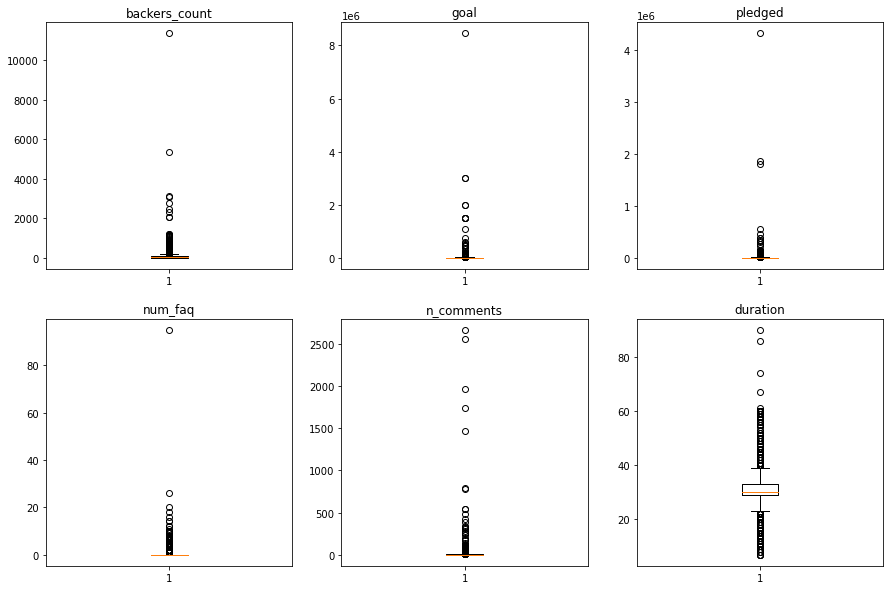

In [235]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15,10))

axs[0, 0].boxplot(num_df["backers_count"])
axs[0, 0].set_title('backers_count')

axs[0, 1].boxplot(num_df["goal"])
axs[0, 1].set_title('goal')

axs[0, 2].boxplot(num_df["pledged"])
axs[0, 2].set_title('pledged')

axs[1, 0].boxplot(num_df["num_faq"])
axs[1, 0].set_title('num_faq')

axs[1, 1].boxplot(num_df["n_comments"])
axs[1, 1].set_title('n_comments')

axs[1, 2].boxplot(num_df["duration"])
axs[1, 2].set_title('duration')

plt.show()

In [236]:
#Boxplot shows that there are extreme outliers, so it is improtant to scale and normalise the data values 

### Exploring text_df

In [237]:
text_df.head()

,blurb,name,story,faq,comments
0,With your help we will create this device that...,Save water 100% liquid downloads in toilets at...,Producto Final\nHi! The funds we will used to ...,[' '],No comments yet.
1,We at Ormiston Primary are looking at starting...,Ormiston Primary Community Garden,At Ormiston Primary School we are looking at c...,[' '],No comments yet.
2,Self-taught aspiring metalsmith Looking for he...,"Aspiring metalsmith in need of better tools, a...",Hello world :-] My name is Bryan. I have been ...,[' '],No comments yet.
3,So many women believe they are past their prim...,Beauty At Any Age,I'm tired of woman being overlooked and consid...,[' '],No comments yet.
4,The Horror Zine's Jeani Rector brings us anoth...,Shrieks and Shivers from the Horror Zine,Table of Contents\n• TAPEWORM by Martin Rose\n...,[' '],Paula Limbaugh\nover 6 years ago\nSo sorry you...


In [238]:
text_df["faq"][39]

'[" How can I pledge to receive more than one copy of the game? I have added two bundle options, allowing to pledge for multiple copies of the game. If you would like to pledge for more than two, please contact me directly. All backers who pledge for either bundle pack are eligible to choose between white or grey when the campaign ends. The choice will be available on the backer survey. Fri, Oct 19 2018 11:37 pm EDT When backing at the $249 tier, will all the cartridges include the 5 backers names in the credits, or will only those 5 cartridges have custom text? Why not both? When backing at the $249 level, your name will be included in the game credits listed at the title in all versions, along with a message of your choice that will only be included on your personal cartridge. If you\'d prefer to keep your name out of the credits, that\'s fine too. It\'s all up to you! Fri, Oct 19 2018 11:37 pm EDT How can I get the vinyl soundtrack if I\'ve pledged for the special edition clear cart

In [239]:
#Feature engineering 2: Combine name (title of project) and blurb (as name is too short and not generalisable)

df[["title_blurb"]] = df[["name", "blurb"]].agg(".".join, axis=1)
df = df.drop(["name","blurb"],axis=1)
df.sample(3)

,backers_count,country,fx_rate,goal,pledged,spotlight,staff_pick,state,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,month_launched,year_launched,title_blurb
157,10,US,1.000000,500,575.00,True,False,1,international,Clifton Film Fest is a homegrown film festival...,[' '],0,No comments yet.,0.0,25,Film & Video,Festivals,6,2014,Clifton Film Fest 2014.Clifton Film Fest is an...
83,30,US,1.000000,15000,4740.00,False,False,0,domestic,What is The Glebe Exhibit?\nThe Glebe Exhibit ...,[' '],0,No comments yet.,0.0,29,Art,Mixed Media,3,2020,The Glebe Exhibit.The Glebe Exhibit is a fundr...
999,156,DE,1.212886,9000,13215.66,True,True,1,domestic,"Hi, I'm Madeline von Foerster, an American pai...","[' Can I hear a sample of the music from the ""...",2,Cate MSuperbacker\nover 1 year ago\nMay we ple...,9.0,25,Art,Painting,10,2016,"""Uprooted"" Exhibition Catalog.""Uprooted"" is a ..."


In [240]:
#Count no comments proportion
print("no comments:",len(text_df[text_df["comments"] == 'No comments yet.']))
print("comments:",len(text_df[text_df["comments"] != 'No comments yet.']))

no comments: 508
comments: 477


In [241]:
#Count faq proportion
text_df["faq"] = text_df['faq'].map(lambda x: x.replace("['   ']","No faq"))
print("no faq:",len(text_df[text_df["faq"] == 'No faq']))
print("with faqs:",len(text_df[text_df["faq"] != 'No faq']))

no faq: 856
with faqs: 129


In [242]:
# more than 50% of the dataset has no comment, and about 80% of dataset has no faq

In [243]:
#pip install langdetect

In [244]:
from langdetect import detect
text_df['language'] = [detect(text) for text in text_df.blurb]
text_df.loc[text_df['language'] != "en"].sample(3)

,blurb,name,story,faq,comments,language
540,"Escrito por especialistas mexicanos, que van d...",Libro 100 años 100 historias de futbol america...,"La historia de la NFL no se conoce en México, ...",No faq,No comments yet.,es
353,"Un disque d'émotion, 100% flamenco puro.\nAndr...","Andrés de Jerez ""Arañando el alma"", le disque ...",ARAÑANDO EL ALMA\nAndrés de Jerez con la guita...,No faq,SamuelitoCreator\nalmost 4 years ago\n@Alexia ...,fr
36,Dank die Larven von den Waffenfliege( hermetia...,Eine Fliege als ökologischer Ingenieur,-stop the overfishing\n-solve the hunger crisi...,No faq,No comments yet.,de


In [245]:
#Add language to main df
df['language'] = [detect(text) for text in df.title_blurb]

In [207]:
text_df["story"][784]

"DIDACTIQUE ET AFFECTIF Javelot.ch est un Média Digital bimestriel indépendant à l'interface d'une vraie revue munie de pages animées à lire sur un ordinateur ou une tablette. Les articles proposent de découvrir des niches de micro-entrepreneuriat et de Talent et la passion d'un métier. La cible du lectorat de Javelot.ch est le consommacteur curieux la seconde cible est de stimuler le Désir Métier chez les jeunes. Les reportages d'entrepreneurs passionnés comprennent des vidéos interactives didactiques sur un savoir-faire dont on en ignore souvent beaucoup. L'avantage certain de l'e-Journal est de pouvoir l'alimenter par des vidéos et des clics interactifs pour accéder rapidement aux sites des entrepreneurs qui s'y sont invités. La lecture dynamique de Javelot offre une alternative pour envisager l'avenir professionnel et surfe sur le Capital social, la toile du net incontournable qui lie les humains et permet les échanges et les informations. L'ADN de Javelot.ch: La consommation est l

In [246]:
# Remove non-english words only (not the entire row as some text might have mix of english and other language)
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [247]:
#Remove non-eng in story

clean_story = []
for i in df["story"]:
    clean = " ".join(w for w in nltk.wordpunct_tokenize(i) \
                 if w.lower() in words or not w.isalpha())
    clean_story.append(clean)

df["story"] = clean_story

In [248]:
df["story"][500]

"In today ' s day and age , , and social media rule everything which is great and terrible all at the same time . It ' s great because you can acquire and share vast of information within versus forty ago when it took days to find out what was happening across the globe . On the other hand , it its . The world is a very large place with an endless amount of and to see and do . People are missing out on all of the great this planet to offer by being distracted by social media and other of electronic entertainment . What if there was a way to combine the two and subliminally get people back into the outdoors ? A place where anyone involved in the outdoors can come , share their , , , and with other like minded . is great , don ' t get me wrong , but I don ' t relate to half of the that roll trough my news feed on a daily basis so it a bit annoying after a while . This will be a place where all of the information you need to the outdoors will be easily accessible . Information regarding h

In [249]:
#Remove non-eng in title_blurb

clean_title_blurb = []
for i in df["title_blurb"]:
    clean = " ".join(w for w in nltk.wordpunct_tokenize(i) \
                 if w.lower() in words or not w.isalpha())
    clean_title_blurb.append(clean)

df["title_blurb"] = clean_title_blurb

In [250]:
df["title_blurb"][512]

'en el Fin . de la " en el Fin "\\ r el en'

In [251]:
#Remove non-eng in faq

clean_faq = []
for i in df["faq"]:
    clean = " ".join(w for w in nltk.wordpunct_tokenize(i) \
                 if w.lower() in words or not w.isalpha())
    clean_faq.append(clean)

df["faq"] = clean_faq

In [252]:
df["faq"][512]

"[' ']"

In [253]:
#Remove non-eng in comments

clean_comments = []
for i in df["comments"]:
    clean = " ".join(w for w in nltk.wordpunct_tokenize(i) \
                 if w.lower() in words or not w.isalpha())
    clean_comments.append(clean)

df["comments"] = clean_comments

In [254]:
df["comments"][512]

'No yet .'

## Look at cleaned dataset after EDA

In [262]:
pd.set_option('display.max_columns', None)
df.sample(3)

,backers_count,country,fx_rate,goal,pledged,spotlight,staff_pick,state,usd_type,story,faq,num_faq,comments,n_comments,duration,parent_category,category_name,month_launched,year_launched,title_blurb,language
253,1,FR,1.212886,10000,25.0,False,False,0,international,"Interested by new , in particular , I had the ...",[' '],0,No yet .,0.0,30,Technology,Web,1,2017,": your virtual personal concierge . , combine ...",en
899,666,US,1.000000,20000,103678.0,True,False,1,domestic,Check out the ! Thank YOU for your support ! i...,[' '],0,Bas van ' t 5 days ago Will we get any ? Natio...,252.0,30,Publishing,Art Books,6,2020,' s Wicked & Epic Tales . Wicked & Epic Tales ...,en
203,2,US,1.000000,10,1000.0,True,False,1,domestic,I ' m Brad and I ' been in live almost every w...,[' '],0,No yet .,0.0,30,Music,World Music,9,2012,Brad Blues Rock Album Bump in the Road . Brad ...,en


In [265]:
#Save to csv
df.to_csv (r'.\Output\TJ_dataset_clean2.csv', index = False, header=True)